A/B tests are used to test changes on a web page by running an experiment where a control group sees the old version, while the experiment group sees the new version. A metric is then chosen to measure the level of engagement from users in each group. These results are then used to judge whether one version is more effective than the other. 

In this case study, I analyze A/B test results for The Company. Here's the customer funnel for typical new users on their site:

View home page > Explore courses > View course overview page > Enroll in course > Complete course

The Company loses users as they go down the stages of this funnel, with only a few making it to the end. It wants to increase average reading duration (ARD), that is why The Company is performing A/B tests to try out changes that will hopefully increase ARD from one stage to the next.

We’ll analyze test results for two changes they have in mind, and then make a recommendation on whether they should launch each change.

###  What are the null and alternative hypotheses?
X_{old} represent the Average Reading Duration when the control group sees the old version of the site. 
X_{new} represent the Average Reading Duration when the experiment group sees the new version of the site. This is how we decide if the old version or the new version is better.


$$H_0: X_{new} - X_{old} <= 0$$


$$H_1: X_{new} - X_{old} > 0$$

##### A/B testing is very much like hypothesis testing with the following hypotheses:

Null Hypothesis: The new version is no better, or even worse, than the old version<br>
Alternative Hypothesis: The new version is better than the old version

If we fail to reject the null hypothesis, the results would suggest keeping the old version. If we reject the null hypothesis, the results would suggest launching the change. These tests can be used for a wide variety of changes, from large feature additions to small adjustments in color, to see what change maximizes your metric the most.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [4]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [7]:
views = df.query("action == 'view'")
views.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [13]:
reading_times = views.groupby(['id', 'group'])['duration'].mean()
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [27]:
control_mean = df.query("group == 'control'")['duration'].mean()
experiment_mean = df.query("group == 'experiment'")['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [28]:
obs_diff = experiment_mean - control_mean
obs_diff # on average the users from experiment group spend 15.5 seconds more on website than users from control group.

15.525098619574393

### Is the difference significant between the two average reading durations?

- First simulate the sampling distribution for the difference in CTR:


In [17]:
diff = []

for i in range(10000):
    bootstrap_sample = df.sample(df.shape[0], replace = True)
    control_mean = bootstrap_sample.query("group == 'control'")['duration'].mean()
    experiment_mean = bootstrap_sample.query("group == 'experiment'")['duration'].mean()
    diff.append(experiment_mean - control_mean)

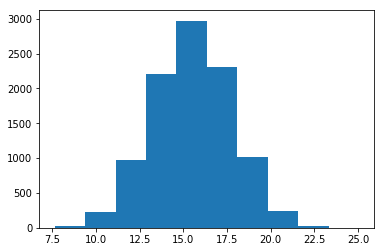

In [18]:
plt.hist(diff);

- Then we use this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size:

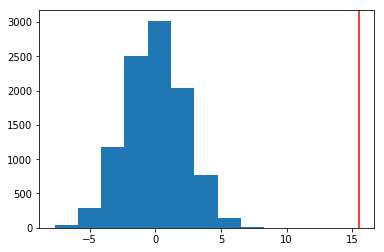

In [22]:
diff = np.array(diff)
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diff.std(), diff.size)

# Plot the null distribution and the observed statistic with the null distibution:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red')

- We compute the p-value by finding the proportion of values in the null distribution that were greater than our observed difference:

In [29]:
# Compute p-value. This is the probability that the observed statistic (the observed 15.5 second difference) came from this H0 distribution.
# Since this is a right-sided hypothesis test, we need the area to the right side from red line (this area is the p_value).
p_value = (null_vals > obs_diff).mean()
p_value

0.0

 The zero p-value means it has 0 probability that the observed statistic came from H0 distribution. So we can reject H0, and there is significant difference between average reading durations on the two version of site.